# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "CF"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'CF',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_CF'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.497  1  0.668 0.415 0.003   
                             age        0.109  1  0.147 0.702 0.001   
                             Kiel       2.582  1  3.475 0.064 0.018   
                             Magdeburg  5.998  1  8.070 0.005 0.041   
                             Sweden     9.103  1 12.248 0.001 0.060   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.831  1  0.882 0.349 0.005   
                             age        1.923  1  2.041 0.155 0.011   
                             Kiel       0.037  1  0.039 0.844 0.000   
                             Magdeburg  1.207  1  1.281 0.259 0.007   
                             Sweden    18.013  1 19.117 0.000 0.091   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.382  0.574    False  
                             age               0.154  0.806    False  
                             Kiel              1.195  0.148    False  
                             Magdeburg         2.302  0.019     True  
                             Sweden            3.237  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.457  0.511    False  
                             age               0.810  0.289    False  
                             Kiel              0.074  0.906    False  
                             Magdeburg         0.587  0.417    False  
                             Sweden            4.695  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                      CF                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.003  1  6.765 0.010 0.034   
                             age        0.008  1  0.053 0.818 0.000   
                             Kiel       0.358  1  2.414 0.122 0.012   
                             Magdeburg  0.681  1  4.596 0.033 0.023   
                             Sweden     2.179  1 14.699 0.000 0.071   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.353  1  2.753 0.099 0.014   
                             age        1.057  1  2.150 0.144 0.011   
                             Kiel       2.450  1  4.985 0.027 0.025   
                             Magdeburg  1.447  1  2.945 0.088 0.015   
                             Sweden    27.652  1 56.270 0.000 0.228   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.999  0.027     True  
                             age               0.087  0.879    False  
                             Kiel              0.914  0.214    False  
                             Magdeburg         1.477  0.074    False  
                             Sweden            3.767  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.006  0.182    False  
                             age               0.841  0.244    False  
                             Kiel              1.573  0.062    False  
                             Magdeburg         1.057  0.165    False  
                             Sweden           11.634  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     CF                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.010         1.999  0.027     True   
                             age       0.818         0.087  0.879    False   
                             Kiel      0.122         0.914  0.214    False   
                             Magdeburg 0.033         1.477  0.074    False   
                             Sweden    0.000         3.767  0.001     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.099         1.006  0.182    False   
                             age       0.144         0.841  0.244    False   
                             Kiel      0.027         1.573  0.062    False   
                             Magdeburg 0.088         1.057  0.165    False   
                             Sweden    0.000        11.634  0.000     True   

model                                     PI                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.415         0.382  0.574    False  
                             age       0.702         0.154  0.806    False  
                             Kiel      0.064         1.195  0.148    False  
                             Magdeburg 0.005         2.302  0.019     True  
                             Sweden    0.001         3.237  0.003     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.349         0.457  0.511    False  
                             age       0.155         0.810  0.289    False  
                             Kiel      0.844         0.074  0.906    False  
                             Magdeburg 0.259         0.587  0.417    False  
                             Sweden    0.000         4.695  0.000     True  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'CF': 'CF', 'PI': 'PI'}

## Describe scores

In [10]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.225         3.267     0.280     0.259         2.489     0.336
std       0.294         6.206     0.320     0.301         5.347     0.328
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.001         0.409     0.002     0.004         0.338     0.015
50%       0.063         1.204     0.125     0.125         0.904     0.249
75%       0.390         3.290     0.520     0.460         2.412     0.613
max       1.000        86.446     1.000     1.000       142.364     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        CF                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.010         1.999   
A0A024R0T9;K7ER74;P02655                           AD     0.029         1.543   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.234         0.631   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.252         0.598   
A0A075B6H7                                         AD     0.005         2.310   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.133         0.876   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.798         0.098   
S4R3U6                                             AD     0.099         1.006   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.027     True   
A0A024R0T9;K7ER74;P02655                           AD      0.065    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.355    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.376    False   
A0A075B6H7                                         AD      0.015     True   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.285    False   
Q9Y6X5                                             AD      0.230    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.158    False   
Q9Y6Y9                                             AD      0.865    False   
S4R3U6                                             AD      0.182    False   

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.415         0.382   
A0A024R0T9;K7ER74;P02655                           AD     0.043         1.371   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.098         1.007   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.527         0.278   
A0A075B6H7                                         AD     0.271         0.567   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.059         1.229   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.493         0.307   
S4R3U6                                             AD     0.349         0.457   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.574    False  
A0A024R0T9;K7ER74;P02655                           AD      0.107    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.208    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.672    False  
A0A075B6H7                                         AD      0.430    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.242         1.576     0.303     0.247         1.411     0.329
std       0.295         1.843     0.318     0.287         1.615     0.313
min       0.000         0.001     0.000     0.000         0.001     0.000
25%       0.007         0.371     0.021     0.012         0.365     0.038
50%       0.092         1.038     0.171     0.118         0.928     0.239
75%       0.426         2.141     0.555     0.431         1.932     0.590
max       0.997        22.259     0.999     0.997        21.555     0.998

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,CF,PI
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,950,1021


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

CF                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.010         1.999  0.027   
A0A024R0T9;K7ER74;P02655                           0.029         1.543  0.065   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.234         0.631  0.355   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.252         0.598  0.376   
A0A075B6H7                                         0.005         2.310  0.015   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.285   
Q9Y6X5                                             0.133         0.876  0.230   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.158   
Q9Y6Y9                                             0.798         0.098  0.865   
S4R3U6                                             0.099         1.006  0.182   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.415   
A0A024R0T9;K7ER74;P02655                              False 0.043   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.098   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.527   
A0A075B6H7                                             True 0.271   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.059   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.493   
S4R3U6                                                False 0.349   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.382  0.574   
A0A024R0T9;K7ER74;P02655                                   1.371  0.107   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         1.007  0.208   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.278  0.672   
A0A075B6H7                                                 0.567  0.430   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.316   
Q9Y6X5                                                     1.229  0.140   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.183   
Q9Y6Y9                                                     0.307  0.644   
S4R3U6                                                     0.457  0.511   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
CF (no)  - PI (no)    886
CF (yes) - PI (yes)   336
CF (yes) - PI (no)    135
CF (no)  - PI (yes)    64
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


CF                                  PI  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.010         1.999  0.027     True 0.415   
A0A075B6H7                   0.005         2.310  0.015     True 0.271   
A0A075B6I0                   0.001         3.133  0.003     True 0.030   
A0A075B6J9                   0.008         2.074  0.023     True 0.059   
A0A075B6Q5                   0.018         1.741  0.045     True 0.658   
...                            ...           ...    ...      ...   ...   
Q9UNW1                       0.803         0.095  0.869    False 0.006   
Q9UP79                       0.000         3.966  0.001     True 0.154   
Q9UQ52                       0.000         3.406  0.002     True 0.116   
Q9Y653;Q9Y653-2;Q9Y653-3     0.730         0.137  0.814    False 0.013   
Q9Y6C2                       0.002         2.640  0.008     True 0.322   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         0.382  0.574    False       186  
A0A075B6H7                           0.567  0.430    False        91  
A0A075B6I0                           1.529  0.081    False       194  
A0A075B6J9                           1.228  0.140    False       156  
A0A075B6Q5                           0.182  0.774    False       104  
...                                    ...    ...      ...       ...  
Q9UNW1                               2.207  0.023     True       171  
Q9UP79                               0.812  0.288    False       135  
Q9UQ52                               0.935  0.237    False       188  
Q9Y653;Q9Y653-2;Q9Y653-3             1.872  0.043     True       177  
Q9Y6C2                               0.492  0.484    False       119  

[199 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,CF,PI,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.027,0.574,186,CF (yes) - PI (no)
A0A024R0T9;K7ER74;P02655,0.065,0.107,195,CF (no) - PI (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.355,0.208,174,CF (no) - PI (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.376,0.672,196,CF (no) - PI (no)
A0A075B6H7,0.015,0.430,91,CF (yes) - PI (no)
...,...,...,...,...
Q9Y6R7,0.285,0.316,197,CF (no) - PI (no)
Q9Y6X5,0.230,0.140,173,CF (no) - PI (no)
Q9Y6Y8;Q9Y6Y8-2,0.158,0.183,197,CF (no) - PI (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,CF,PI,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
Q8N9I0,0.005,0.969,141,CF (yes) - PI (no),0.964
P43004;P43004-2;P43004-3,0.030,0.980,89,CF (yes) - PI (no),0.951
Q9BX67,0.983,0.038,161,CF (no) - PI (yes),0.945
Q9NPH3;Q9NPH3-2;Q9NPH3-5,0.029,0.959,186,CF (yes) - PI (no),0.931
A0A087WU43;A0A087WX17;A0A087WXI5;P12830;P12830-2,0.000,0.913,134,CF (yes) - PI (no),0.913
...,...,...,...,...,...
F5GY80;F5H7G1;P07358,0.047,0.057,197,CF (yes) - PI (no),0.010
Q9NX62,0.046,0.056,197,CF (yes) - PI (no),0.010
P00740;P00740-2,0.043,0.053,197,CF (yes) - PI (no),0.010


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_1_CF


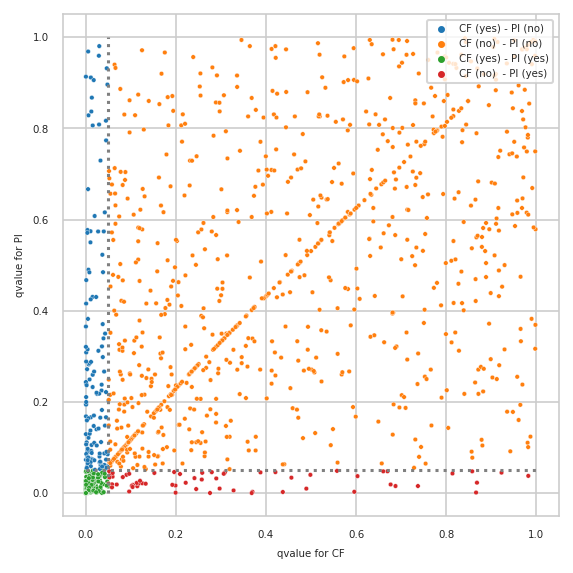

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_2_CF


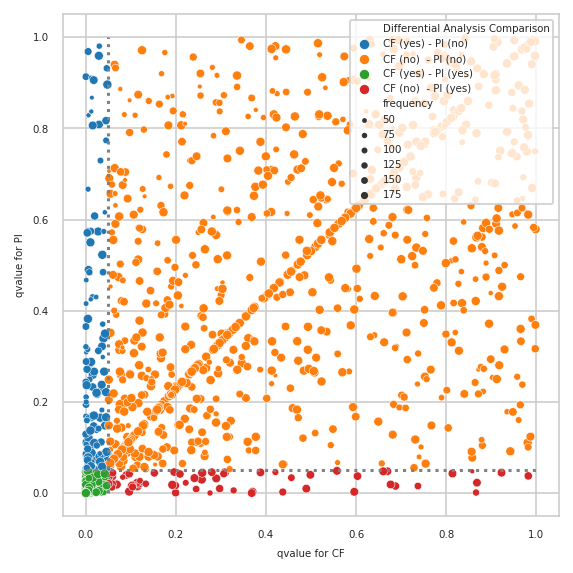

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

vaep.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
PSEN1,ENSP00000326366,5.000
APOE,ENSP00000252486,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
ZBTB22,ENSP00000407545,0.683
HMGN2,ENSP00000355228,0.683
PPP1R13B,ENSP00000202556,0.683


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out